# CS271-HW6-Ch5-Q12

## Prepare Train Set (malware=+1; benigh=-1) and Test Set

In [8]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
# Train Set Prep
df = pd.read_csv("malwareBenignScores.txt.reformat", sep='\s+', header=0)
#
from sklearn.svm import SVC
import numpy as np
# Train Set Prep
# Training Column Vectors
m=df[['HMM_M', 'SSD_M', 'OGS_M']].to_numpy()
b=df[['HMM_B', 'SSD_B', 'OGS_B']].to_numpy()
trX=np.concatenate((m[:20], b[:20]), axis=0)
# Corresponding label z (maline=+1; benigh=-1)
trZ=[1]*20+[-1]*20
# Test Set Prep 
testX=np.concatenate((m[20:], b[20:]), axis=0)


## Training and Scoring with all 3 features

In [9]:
from sklearn.svm import SVC
# Ch5-Q12a)
# HMM model
model = SVC(gamma='auto', kernel='linear')
model.fit(trX, trZ) 
pred_1=model.predict(testX)
acc_1=model.score(testX, trZ)
w=model.coef_
print("\nCh5-Q12a) All scores included : HMM, SSD and OGS")
print("Accuracy=%.3f" % acc_1)
print("wt(HMM)=%.4f" % w[0,0])
print("wt(SSD)=%.4f" % w[0,1])
print("wt(OGS)=%.4f" % w[0,2])
print(model)


Ch5-Q12a) All scores included : HMM, SSD and OGS
Accuracy=0.950
wt(HMM)=0.1969
wt(SSD)=-0.5349
wt(OGS)=-0.7049
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [12]:
import matplotlib.pyplot as plt
print(testX.T[:10])
x, y = testX.T
c = ['red' if i > 0 else 'blue' for i in z]
plt.scatter(x, y, c=c)
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]
# Plot the hyperplane
plt.plot(xx, yy)

[[  -2.4743   -2.5167   -2.5318   -2.3913   -2.6346   -2.5553   -2.5426
    -2.3792  -13.5807   -2.5571   -2.5179   -2.5161   -2.6699   -2.4019
    -2.4906   -2.5358  -12.5585   -2.3902   -2.5675   -2.4462  -21.6937
   -14.2945  -21.9569  -27.6297  -19.0987  -22.5225  -31.2162 -148.9674
   -42.8055  -51.2141  -21.3982  -17.8242 -169.1587  -45.4216  -22.7345
   -15.0389  -13.6486  -14.1127  -15.7107  -33.7041]
 [   0.383     0.466     0.458     0.437     0.436     0.46      0.477
     0.431     1.408     0.429     0.355     0.398     0.478     0.397
     0.447     0.929     0.419     0.478     0.416     0.4       0.858
     0.906     0.999     0.863     0.927     0.94      0.908     0.993
     1.036     0.949     1.002     0.992     1.018     1.059     0.858
     0.857     0.851     0.848     0.875     1.037 ]
 [   0.3506    0.3861    0.3588    0.3407    0.4723    0.3527    0.3269
     0.3136    0.326     0.3729    0.3303    0.3033    0.395     0.336
     0.3694    0.9425    0.3946    0

ValueError: too many values to unpack (expected 2)

## Eliminate the lowest weight feature: HMM

In [3]:
# Training Column Vectors excluding HMM
m=df[['SSD_M', 'OGS_M']].to_numpy()
b=df[['SSD_B', 'OGS_B']].to_numpy()
trX=np.concatenate((m[:20], b[:20]), axis=0)
# Corresponding label z (maline=+1; benigh=-1)
trZ=[1]*20+[-1]*20
# Test Set Prep 
testX=np.concatenate((m[20:], b[20:]), axis=0)


## Training and Scoring on the 2 features

In [4]:
#
model2 = SVC(gamma='auto', kernel='linear')
model2.fit(trX, trZ) 
pred_2=model2.predict(testX)
acc_2=model2.score(testX, trZ)
w=model2.coef_
print("\nCh5-Q12b) Excluding HMM score")
print("Accuracy=%.3f" % acc_2)
print("wt(SSD)=%.4f" % w[0,0])
print("wt(OGS)=%.4f" % w[0,1])


Ch5-Q12b) Excluding HMM score
Accuracy=0.950
wt(SSD)=-2.4449
wt(OGS)=-2.2419


## Eliminate the next lowest weight feature: OGS

In [5]:
# Training Column Vectors excluding HMM and SSD
m=df[['SSD_M']].to_numpy()
b=df[['SSD_B']].to_numpy()
trX=np.concatenate((m[:20], b[:20]), axis=0)
# Corresponding label z (maline=+1; benigh=-1)
trZ=[1]*20+[-1]*20
# Test Set Prep 
testX=np.concatenate((m[20:], b[20:]), axis=0)

## Training and Scoring on the 1 feature

In [6]:
#
model3 = SVC(gamma='auto', kernel='linear')
model3.fit(trX, trZ) 
pred_3=model3.predict(testX)
acc_3=model3.score(testX, trZ)
w=model3.coef_
print("\nCh5-Q12b) Excluding HMM and OGS scores")
print("Accuracy=%.3f" % acc_3)
print("wt(OGS)=%.4f" % w[0,0])
print(model3)


Ch5-Q12b) Excluding HMM and OGS scores
Accuracy=0.950
wt(OGS)=-3.8760
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## SVM Classification Result

Text(0, -0.5, 'accuracy=0.9500')

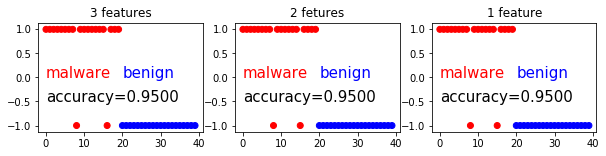

In [9]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2))
col=['red' if i > 0 else 'blue' for i in trZ]
x=[i for i in range(len(pred_1))]
    
y=pred_1 
ax1.scatter(x, y, color=col); ax1.set_title('3 features')
ax1.text(0, 0, 'malware', {'color': 'r', 'fontsize': 15})
ax1.text(20, 0, 'benign', {'color': 'b', 'fontsize': 15})
ax1.text(0, -0.5, 'accuracy=%.4f' % acc_1, {'color': 'black', 'fontsize': 15})

y=pred_2 
ax2.scatter(x, y, color=col); ax2.set_title('2 fetures')
ax2.text(0, 0, 'malware', {'color': 'r', 'fontsize': 15})
ax2.text(20, 0, 'benign', {'color': 'b', 'fontsize': 15})
ax2.text(0, -0.5, 'accuracy=%.4f' % acc_2, {'color': 'black', 'fontsize': 15})

y=pred_3 
ax3.scatter(x, y, color=col); ax3.set_title('1 feature')
ax3.text(0, 0, 'malware', {'color': 'r', 'fontsize': 15})
ax3.text(20, 0, 'benign', {'color': 'b', 'fontsize': 15})
ax3.text(0, -0.5, 'accuracy=%.4f' % acc_3, {'color': 'black', 'fontsize': 15})
